In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = './data/housing.csv'

In [3]:
df_data = pd.read_csv(DATA_PATH)
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 检查不同收入水平的样本数量

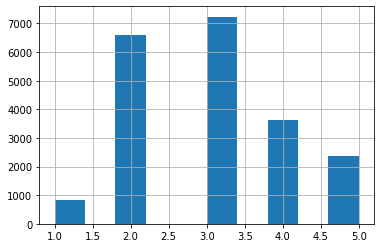

In [4]:
df_data['income_cat'] = pd.cut(df_data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df_data["income_cat"].hist()
plt.show()

## 按比例随机划分数据

In [5]:
from sklearn.model_selection import train_test_split

df_train_random, df_test_random = train_test_split(df_data, test_size=0.2, random_state=42)

## 按收入水平分层划分数据

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df_data, df_data["income_cat"]):
    df_train_strat = df_data.loc[train_idx]
    df_test_strat = df_data.loc[test_idx]

## 对比两种划分方式中不同收入水平样本所占的比例

In [7]:
def income_cat_proportion(df_data):
    return df_data['income_cat'].value_counts() / len(df_data)

df_compare = pd.DataFrame({
    'overall': income_cat_proportion(df_data),
    'random': income_cat_proportion(df_test_random),
    'stratified': income_cat_proportion(df_test_strat),
}).sort_index()

df_compare['rand_error'] = 100 * df_compare['random'] / df_compare['overall'] - 100
df_compare['strat_error'] = 100 * df_compare['stratified'] / df_compare['overall'] - 100

In [8]:
df_compare

,overall,random,stratified,rand_error,strat_error
1,0.039826,0.040213,0.039729,0.973236,-0.243309
2,0.318847,0.324370,0.318798,1.732260,-0.015195
3,0.350581,0.358527,0.350533,2.266446,-0.013820
4,0.176308,0.167393,0.176357,-5.056334,0.027480
5,0.114438,0.109496,0.114583,-4.318374,0.127011
